# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\users\pepto\anaconda3\lib\site-packages (4.14.3)
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
import numpy as np

import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import matplotlib.ticker as mtick
# import seaborn as sns

from iso3166 import countries
from datetime import datetime, timedelta

import random

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv', thousands=',')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [8]:
df_data.isnull().values.any()

True

In [9]:
df_data.isnull().sum().sum()

3360

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [10]:
df_data.head()

Unnamed: 0  Unnamed: 0.1 Organisation  \
0           0             0       SpaceX   
1           1             1         CASC   
2           2             2       SpaceX   
3           3             3    Roscosmos   
4           4             4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive  50.00        Success  
1  StatusActive  29.75        Success  
2  StatusActive    nan        Success  
3  StatusActive  65.00        Success  
4  StatusActive 145.00        Success

In [11]:
df_data[['Unnamed: 0', 'Unnamed: 0.1']]

Unnamed: 0  Unnamed: 0.1
0              0             0
1              1             1
2              2             2
3              3             3
4              4             4
...          ...           ...
4319        4319          4319
4320        4320          4320
4321        4321          4321
4322        4322          4322
4323        4323          4323

[4324 rows x 2 columns]

In [12]:
del df_data['Unnamed: 0']
del df_data['Unnamed: 0.1']

In [13]:
df_data.tail()

Organisation                                   Location  \
4319      US Navy   LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA   LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy   LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date                      Detail  Rocket_Status  \
4319  Wed Feb 05, 1958 07:33 UTC   Vanguard | Vanguard TV3BU  StatusRetired   
4320  Sat Feb 01, 1958 03:48 UTC         Juno I | Explorer 1  StatusRetired   
4321  Fri Dec 06, 1957 16:44 UTC     Vanguard | Vanguard TV3  StatusRetired   
4322  Sun Nov 03, 1957 02:30 UTC  Sputnik 8K71PS | Sputnik-2  StatusRetired   
4323  Fri Oct 04, 1957 19:28 UTC  Sputnik 8K71PS | Sputnik-1  StatusRetired   

      Price Mission_Status  
4319    nan        Failure  
4320    nan        Success  
4321    nan        Failure  
4322    nan        Success  
4323    nan        Success

## Descriptive Statistics

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [14]:
df_data.head(1)

Organisation                                    Location  \
0       SpaceX  LC-39A, Kennedy Space Center, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   

  Rocket_Status  Price Mission_Status  
0  StatusActive  50.00        Success

In [15]:
organisation = df_data.Organisation.unique()
organisation

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [16]:
launches = df_data.groupby('Organisation').size().sort_values(ascending=False)
launches

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Eurockot              13
ESA                   13
ISA                   13
Rocket Lab            13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
KCST                   5
UT                     5
CASIC                  5
CECLES                 4
Arm??e de l'Air        4
Exos        

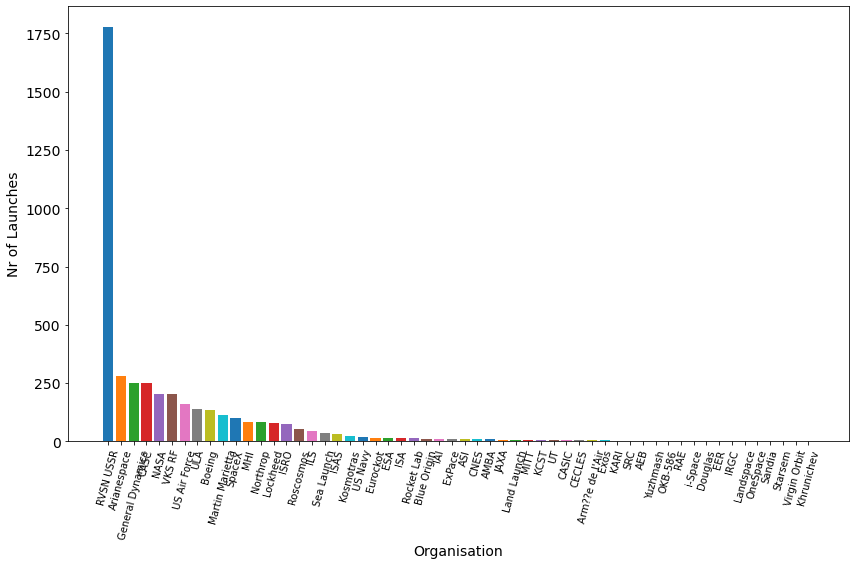

In [17]:
plt.figure(figsize=(14,8))
plt.ylabel('Nr of Launches', fontsize=14)
plt.xlabel('Organisation', fontsize=14)

for n in range(len(organisation)):
    plt.xticks(fontsize=10, rotation=75)
    plt.yticks(fontsize=14)
    plt.bar(launches.index[n], launches[n])

plt.show()

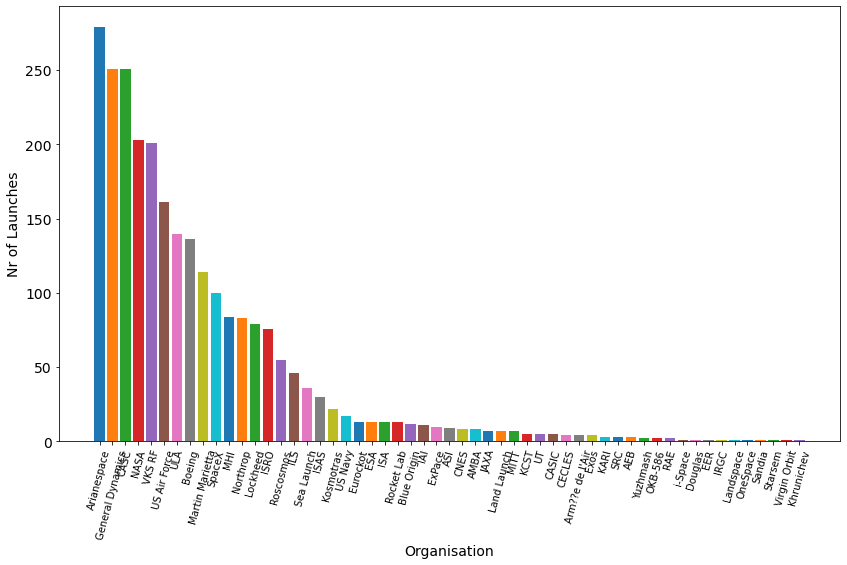

In [18]:
# Cut out RVSN USSR
plt.figure(figsize=(14,8))
plt.ylabel('Nr of Launches', fontsize=14)
plt.xlabel('Organisation', fontsize=14)

for n in range(1, len(organisation)):
    plt.xticks(fontsize=10, rotation=75)
    plt.yticks(fontsize=14)
    plt.bar(launches.index[n], launches[n])

plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [19]:
df_data.head(1)
df_data.groupby('Rocket_Status').count()

Organisation  Location  Date  Detail  Price  Mission_Status
Rocket_Status                                                             
StatusActive            790       790   790     790    586             790
StatusRetired          3534      3534  3534    3534    378            3534

In [20]:
df_data[df_data.Rocket_Status == 'StatusActive'].count().iloc[0]

790

In [21]:
df_data[df_data.Rocket_Status == 'StatusRetired'].count().iloc[0]

3534

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [22]:
df_data.groupby('Mission_Status').count()

Organisation  Location  Date  Detail  Rocket_Status  Price
Mission_Status                                                               
Failure                     339       339   339     339            339     36
Partial Failure             102       102   102     102            102     17
Prelaunch Failure             4         4     4       4              4      1
Success                    3879      3879  3879    3879           3879    910

In [23]:
df_data[df_data.Mission_Status == 'Success'].count().iloc[0]

3879

In [24]:
df_data[df_data.Mission_Status != 'Success'].count().iloc[0]

445

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [25]:
date_data = df_data.copy()
date_data.dropna()
for i, row in date_data.iterrows():
    date = row['Date'].split()[3]
    date_data.at[i, 'Date'] = date
date_data.Date

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
4319    1958
4320    1958
4321    1957
4322    1957
4323    1957
Name: Date, Length: 4324, dtype: object

In [26]:
date_price = date_data.groupby('Date')['Price'].sum()
date_price.index.sort_values()
date_price

Date
1957       0.00
1958       0.00
1959       0.00
1960       0.00
1961       0.00
         ...   
2016   5,085.27
2017   4,586.41
2018   5,697.98
2019   4,351.51
2020   2,945.81
Name: Price, Length: 64, dtype: float64

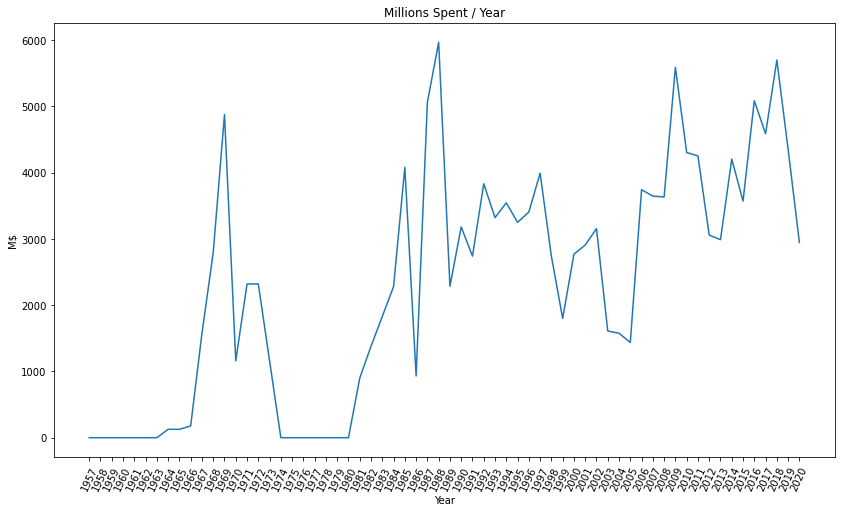

In [27]:
plt.figure(figsize=(14,8))
plt.plot(date_price.index, date_price, label='')
plt.xticks(ticks=date_price.index, labels=date_price.index, fontsize=10, rotation=65)
plt.title('Millions Spent / Year')
plt.xlabel('Year')
plt.ylabel('M$')

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [28]:
df_data.reset_index()

index Organisation                                           Location  \
0         0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2         2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3         3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4         4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...     ...          ...                                                ...   
4319   4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320   4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321   4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322   4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323   4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive    nan   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired    nan   
4320                           Juno I | Explorer 1  StatusRetired    nan   
4321                       Vanguard | Vanguard TV3  StatusRetired    nan   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired    nan   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired    nan   

     Mission_Status  
0           Success  
1           Success  
2           Success  
3           Success  
4           Success  
...             ...  
4319        Failure  
4320        Success  
4321        Failure  
4322        Success  
4323        Success  

[4324 rows x 8 columns]

In [29]:
df = df_data.copy()
df['alpha3'] = df.Location.str.split(',')

In [30]:
for c in countries:
       print(c)

Country(name='Afghanistan', alpha2='AF', alpha3='AFG', numeric='004', apolitical_name='Afghanistan')
Country(name='Åland Islands', alpha2='AX', alpha3='ALA', numeric='248', apolitical_name='Åland Islands')
Country(name='Albania', alpha2='AL', alpha3='ALB', numeric='008', apolitical_name='Albania')
Country(name='Algeria', alpha2='DZ', alpha3='DZA', numeric='012', apolitical_name='Algeria')
Country(name='American Samoa', alpha2='AS', alpha3='ASM', numeric='016', apolitical_name='American Samoa')
Country(name='Andorra', alpha2='AD', alpha3='AND', numeric='020', apolitical_name='Andorra')
Country(name='Angola', alpha2='AO', alpha3='AGO', numeric='024', apolitical_name='Angola')
Country(name='Anguilla', alpha2='AI', alpha3='AIA', numeric='660', apolitical_name='Anguilla')
Country(name='Antarctica', alpha2='AQ', alpha3='ATA', numeric='010', apolitical_name='Antarctica')
Country(name='Antigua and Barbuda', alpha2='AG', alpha3='ATG', numeric='028', apolitical_name='Antigua and Barbuda')
Countr

In [31]:
for i, row in df.iterrows():
    country = row['alpha3'][-1]
    splitted = country.split()
    country = ' '.join(splitted)
    if country == 'Russia' or country == 'Barents Sea':
        country = 'Russian Federation'
    if country == 'Yellow Sea':
        country = 'China'
    if country == 'Pacific Missile Range Facility' or country == 'Gran Canaria' or country == 'New Mexico' or country == 'Pacific Ocean':
        country = 'USA'
    if country == 'Shahrud Missile Test Site' or country == 'Iran':
        country = 'Iran, Islamic Republic of'
    if country == 'North Korea' or country == 'South Korea':
        country = "Korea, Democratic People's Republic of"
#     print(country)
    a3 = countries.get(country).alpha3
    df.at[i, 'alpha3'] = a3

df.alpha3.unique()

array(['USA', 'CHN', 'KAZ', 'JPN', 'ISR', 'NZL', 'RUS', 'IRN', 'FRA',
       'IND', 'PRK', 'BRA', 'KEN', 'AUS'], dtype=object)

In [32]:
countries_to_map = df.groupby('alpha3').size().sort_values(ascending=False)
countries_to_map

alpha3
RUS    1398
USA    1387
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
IRN      14
NZL      13
ISR      11
KEN       9
PRK       8
AUS       6
BRA       3
dtype: int64

In [33]:
fig = go.Figure(data=go.Choropleth(
    locations = countries_to_map.index,
    z = countries_to_map,
    text = countries_to_map.index,
    colorscale = 'Aggrnyl',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Launches',
))
fig.update_layout(
    title_text='Total Launches by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: mission_launches.csv',
        showarrow = False
    )]
)


fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [34]:
failures_to_map = df[df['Mission_Status'] != 'Success'].groupby('alpha3').size().sort_values(ascending=False)
failures_to_map

alpha3
USA    166
RUS     93
KAZ     93
CHN     25
FRA     18
JPN     13
IND     13
IRN      9
PRK      5
BRA      3
AUS      3
NZL      2
ISR      2
dtype: int64

In [35]:
fig = go.Figure(data=go.Choropleth(
    locations = failures_to_map.index,
    z = failures_to_map,
    text = failures_to_map.index,
    colorscale = 'Hot',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Failures',
))
fig.update_layout(
    title_text='Total Failures by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: mission_launches.csv',
        showarrow = False
    )]
)


fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [36]:
df.head(1)

Organisation                                    Location  \
0       SpaceX  LC-39A, Kennedy Space Center, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   

  Rocket_Status  Price Mission_Status alpha3  
0  StatusActive  50.00        Success    USA

In [37]:
fig = px.sunburst(
    df,
    path= ['alpha3', 'Organisation', 'Mission_Status']
)
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [38]:
spent = df.groupby('Organisation')['Price'].sum().sort_values(ascending=False)
spent = spent[spent != 0.00]
spent

Organisation
NASA              76,280.00
Arianespace       16,345.00
ULA               14,798.00
RVSN USSR         10,000.00
CASC               6,340.26
SpaceX             5,444.00
Northrop           3,930.00
MHI                3,532.50
ISRO               2,177.00
US Air Force       1,550.92
VKS RF             1,548.90
ILS                1,320.00
Boeing             1,241.00
Roscosmos          1,187.50
Martin Marietta      721.40
Kosmotras            638.00
Eurockot             543.40
Lockheed             280.00
JAXA                 168.00
Rocket Lab            97.50
ESA                   37.00
ExPace                28.30
EER                   20.00
Sandia                15.00
Virgin Orbit          12.00
Name: Price, dtype: float64

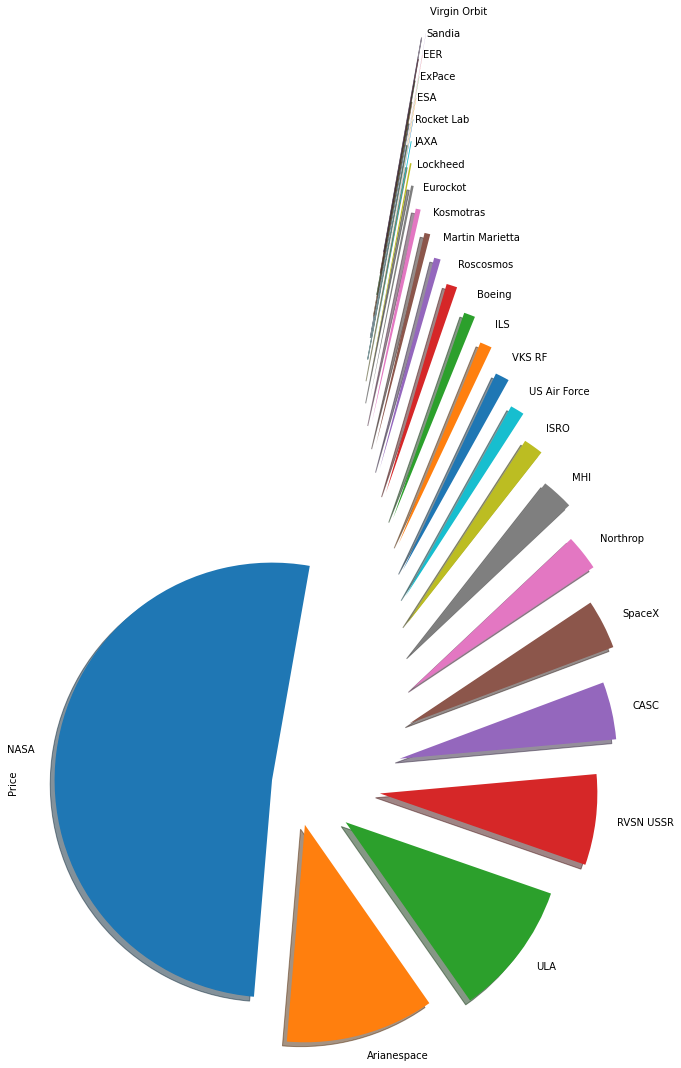

In [39]:
explode = []
s = 0
for n in range(len(spent)):
    s += 0.1
    explode.append(s)

    
pie = spent.plot(kind='pie', y=spent, shadow=True, subplots=True, startangle=80, figsize=(10,10), explode=explode)


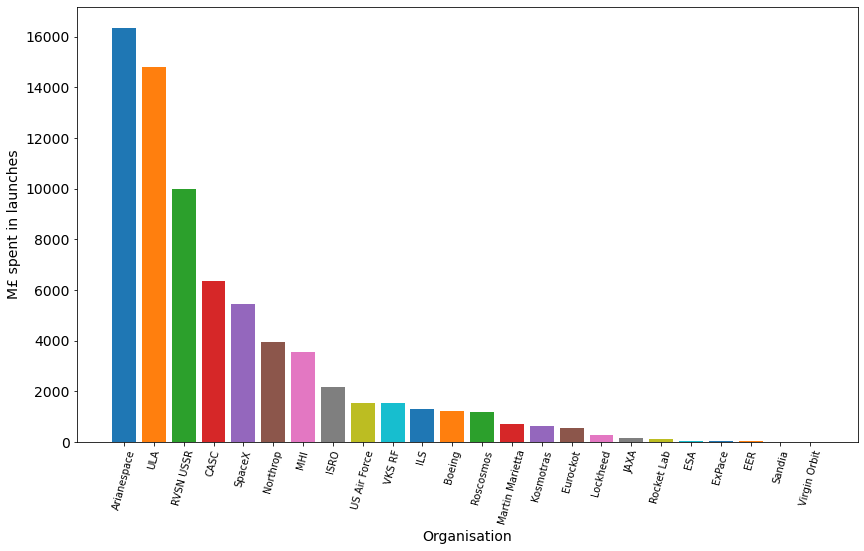

In [40]:
# Nasa dominates spending, so cut it out for the next chart
plt.figure(figsize=(14,8))
plt.ylabel('M£ spent in launches', fontsize=14)
plt.xlabel('Organisation', fontsize=14)

for n in range(1, len(spent)):
    plt.xticks(fontsize=10, rotation=75)
    plt.yticks(fontsize=14)
    plt.bar(spent.index[n], spent[n])

plt.show()


# Analyse the Amount of Money Spent by Organisation per Launch

In [41]:
prices = df.copy()
price_data = prices.groupby('Organisation').agg({'Price': ['mean', 'min', 'max']})
price_data.columns = ['Mean Price', 'Min Price', 'Max Price']
price_data = price_data.sort_values('Mean Price', ascending=False)
price_data.dropna(subset = ['Mean Price'], how='all', inplace=True)
price_data

Mean Price  Min Price  Max Price
Organisation                                     
RVSN USSR          5,000.00   5,000.00   5,000.00
NASA                 511.95     450.00   1,160.00
Boeing               177.29     133.00     350.00
Arianespace          170.26      37.00     200.00
ULA                  151.00     109.00     350.00
ILS                  101.54      65.00     153.00
MHI                   95.47      90.00     112.50
Martin Marietta       80.16      35.00     136.60
US Air Force          59.65      59.00      63.23
JAXA                  56.00      39.00      90.00
SpaceX                54.99       7.00      90.00
Roscosmos             51.63      35.00      65.00
Northrop              47.35      40.00      85.00
VKS RF                46.94      35.00      65.00
Eurockot              41.80      41.80      41.80
CASC                  40.13       5.30      69.70
ESA                   37.00      37.00      37.00
Lockheed              35.00      35.00      35.00
ISRO                  32.49      21.00      62.00
Kosmotras             29.00      29.00      29.00
ExPace                28.30      28.30      28.30
EER                   20.00      20.00      20.00
Sandia                15.00      15.00      15.00
Virgin Orbit          12.00      12.00      12.00
Rocket Lab             7.50       7.50       7.50

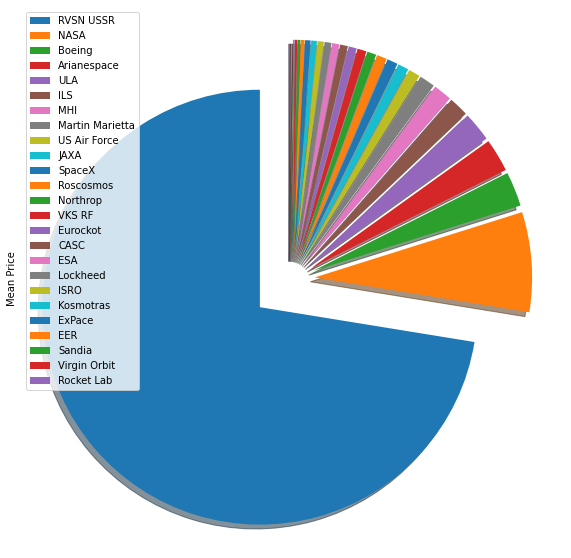

In [42]:
explode = []
for n in range(len(price_data)):
    explode.append(0.1)
explode[0] = 0.2
    
pie = price_data.plot(kind='pie', y='Mean Price', shadow=True, subplots=True, startangle=90, figsize=(15,10), labeldistance=None, explode=explode)


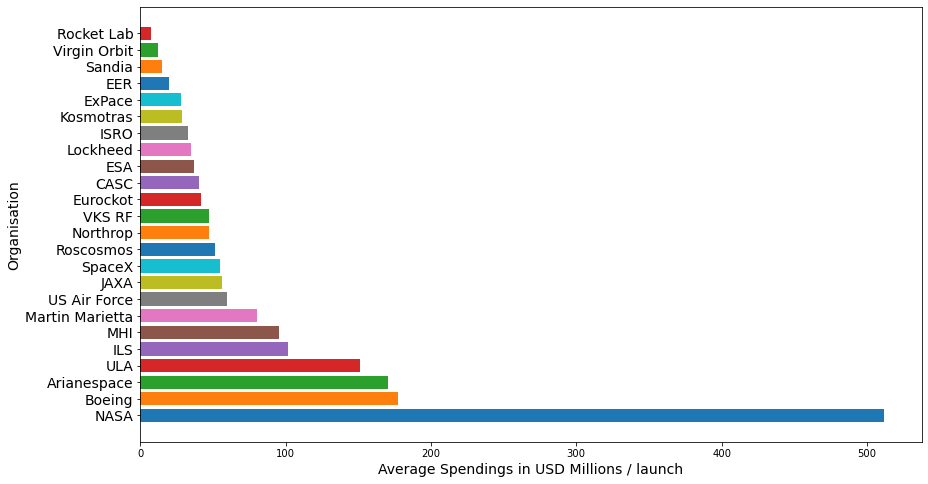

In [43]:
# RVSN USSR dominates for spending, so cut it out from next graph

plt.figure(figsize=(14,8))
plt.ylabel('Organisation', fontsize=14)
plt.xlabel('Average Spendings in USD Millions / launch', fontsize=14)

for n in range(1, len(price_data)):
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=14)
    plt.barh(price_data.index[n], price_data['Mean Price'][n])

plt.show()

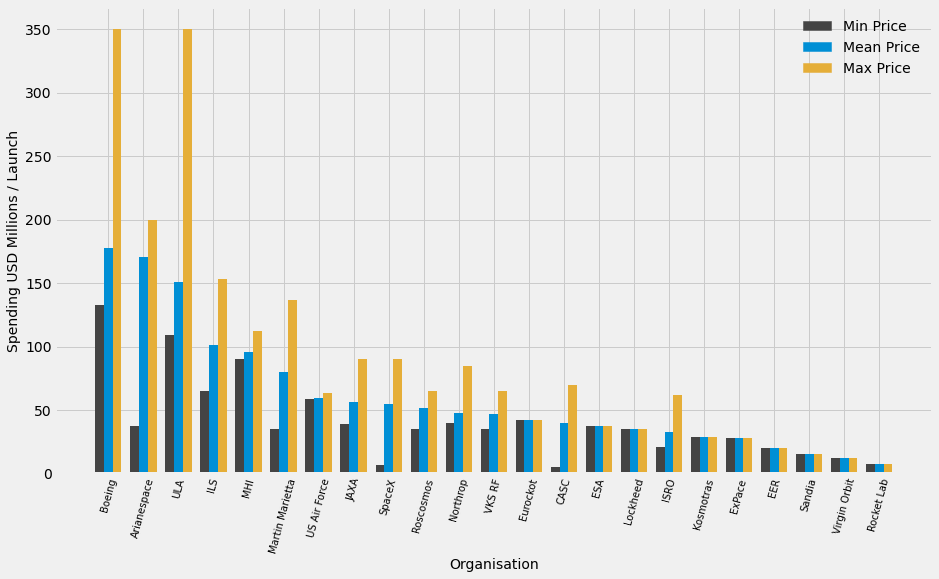

In [44]:
# Cut out NASA too, add little bit more details
cut_data = price_data.drop(['RVSN USSR', 'NASA'])

plt.style.use('fivethirtyeight')

x_indexes = np.arange(len(cut_data))
width = 0.25

plt.figure(figsize=(14,8))
plt.ylabel('Spending USD Millions / Launch', fontsize=14)
plt.xlabel('Organisation', fontsize=14)

labels = []
for n in range(len(cut_data)):
#     plt.yticks(fontsize=14)
    plt.bar(x_indexes[n] - width, cut_data['Min Price'][n], width=width, color='#444444')
    plt.bar(x_indexes[n], cut_data['Mean Price'][n], width=width, color='#008fd5')
    plt.bar(x_indexes[n] + width, cut_data['Max Price'][n], width=width, color='#e5ae38')
    labels.append(cut_data.index[n])

min_legend = mpatches.Patch(color='#444444', label='Min Price')
mean_legend = mpatches.Patch(color='#008fd5', label='Mean Price')
max_legend = mpatches.Patch(color='#e5ae38', label='Max Price')
plt.legend(handles=[min_legend, mean_legend, max_legend], loc='upper right', frameon=False)
    
plt.xticks(ticks=x_indexes, labels=labels, fontsize=10, rotation=75)
plt.show()

In [45]:
date_data.head()

Organisation                                           Location  Date  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA  2020   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...  2020   
2       SpaceX                      Pad A, Boca Chica, Texas, USA  2020   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan  2020   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA  2020   

                                         Detail Rocket_Status  Price  \
0  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky  StatusActive  50.00   
1           Long March 2D | Gaofen-9 04 & Q-SAT  StatusActive  29.75   
2            Starship Prototype | 150 Meter Hop  StatusActive    nan   
3  Proton-M/Briz-M | Ekspress-80 & Ekspress-103  StatusActive  65.00   
4                    Atlas V 541 | Perseverance  StatusActive 145.00   

  Mission_Status  
0        Success  
1        Success  
2        Success  
3        Success  
4        Success

# Chart the Number of Launches per Year

In [46]:
launch = date_data.groupby('Date')['Detail'].count()
launch.tail()

Date
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Detail, dtype: int64

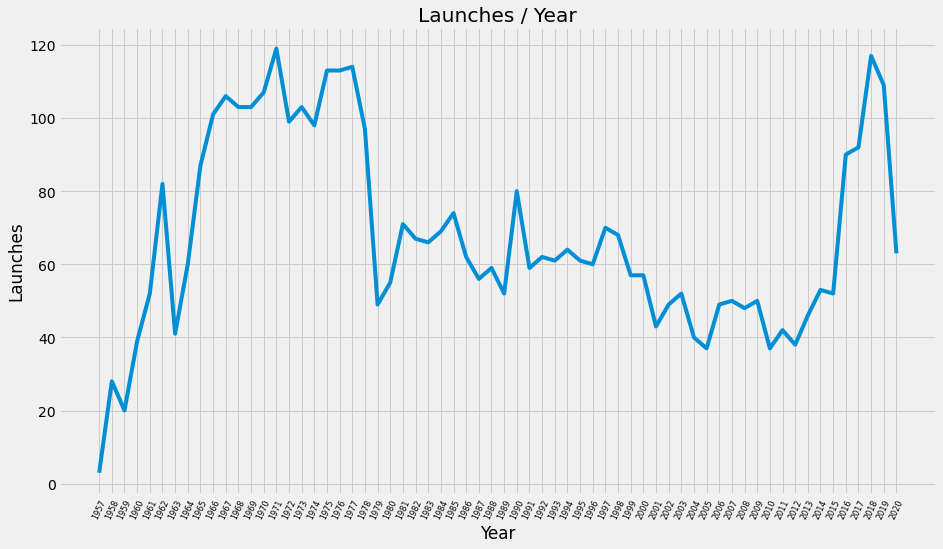

In [47]:
plt.figure(figsize=(14,8))
plt.plot(launch.index, launch)
plt.xticks(ticks=launch.index, fontsize=8, rotation=65)
plt.title('Launches / Year')
plt.xlabel('Year')
plt.ylabel('Launches')

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [48]:
month_data = df.copy()
month_data['year'] = df.Date.str.split(',')
month_data['month'] = df.Date.str.split(',')
month_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status alpha3                           year  \
0  StatusActive  50.00        Success    USA  [Fri Aug 07,  2020 05:12 UTC]   
1  StatusActive  29.75        Success    CHN  [Thu Aug 06,  2020 04:01 UTC]   
2  StatusActive    nan        Success    USA  [Tue Aug 04,  2020 23:57 UTC]   
3  StatusActive  65.00        Success    KAZ  [Thu Jul 30,  2020 21:25 UTC]   
4  StatusActive 145.00        Success    USA  [Thu Jul 30,  2020 11:50 UTC]   

                           month  
0  [Fri Aug 07,  2020 05:12 UTC]  
1  [Thu Aug 06,  2020 04:01 UTC]  
2  [Tue Aug 04,  2020 23:57 UTC]  
3  [Thu Jul 30,  2020 21:25 UTC]  
4  [Thu Jul 30,  2020 11:50 UTC]

In [49]:
for i, row in month_data.iterrows():
    month = row['month'][0] 
    splitted_m = month.split()
    new_month = ''.join(splitted_m[1])
    month_num = datetime.strptime(new_month, '%b').month
    month_data.at[i, 'month'] = month_num
    
month_data.month.unique()

array([8, 7, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9], dtype=object)

In [50]:
for i, row in month_data.iterrows():
    year = row['year'][1]
    splitted = year.split()
    new_year = ''.join(splitted[0])
#     print(new_year)
    month_data.at[i, 'year'] = new_year

month_data.year.unique()

array(['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997',
       '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989',
       '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981',
       '1980', '1979', '1978', '1977', '1976', '1975', '1974', '1973',
       '1972', '1971', '1970', '1969', '1968', '1967', '1966', '1965',
       '1964', '1963', '1962', '1961', '1960', '1959', '1958', '1957'],
      dtype=object)

In [51]:
month_data.month = month_data.month.astype(str)
month_data.year = month_data.year.astype(str)
month_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status alpha3  year month  
0  StatusActive  50.00        Success    USA  2020     8  
1  StatusActive  29.75        Success    CHN  2020     8  
2  StatusActive    nan        Success    USA  2020     8  
3  StatusActive  65.00        Success    KAZ  2020     7  
4  StatusActive 145.00        Success    USA  2020     7

In [52]:
month_data['time'] = month_data[['year', 'month']].agg('-'.join, axis=1)

month_count = month_data.groupby("time")['Detail'].count()
month_count

time
1957-10     1
1957-11     1
1957-12     1
1958-10     3
1958-11     1
           ..
2020-4      5
2020-5      9
2020-6      7
2020-7     14
2020-8      3
Name: Detail, Length: 747, dtype: int64

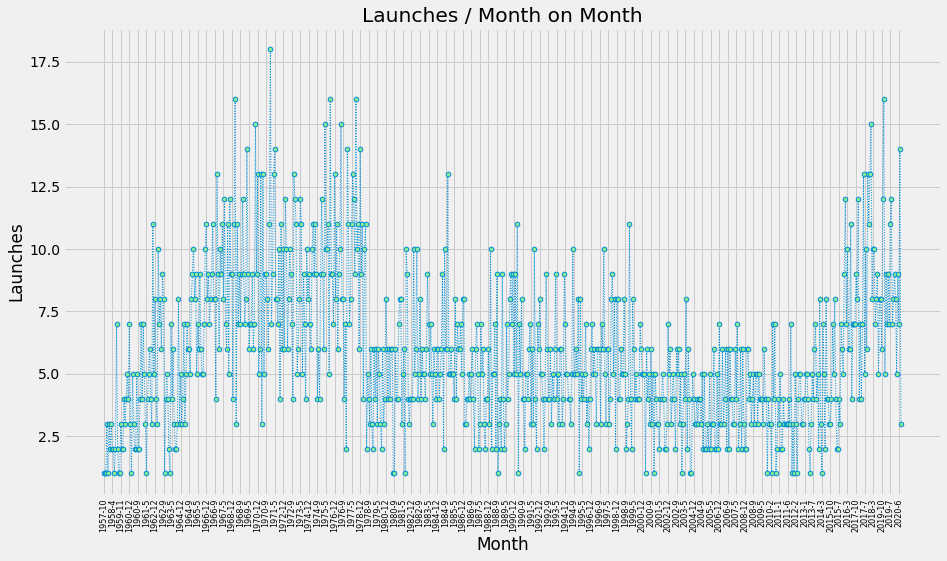

In [53]:
plt.figure(figsize=(14,8))
plt.plot(month_count, linewidth=1, linestyle=':', marker='h', markerfacecolor='lightgreen', markeredgewidth=1,
         markersize=5, markevery=1)
plt.xticks(month_count.index[::8], fontsize=8, rotation=90)
plt.title('Launches / Month on Month')
plt.xlabel('Month')
plt.ylabel('Launches')

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [54]:
monthly_launches = month_data.groupby('month')['month'].count()
monthly_launches.index.sort_values()

Index(['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object', name='month')

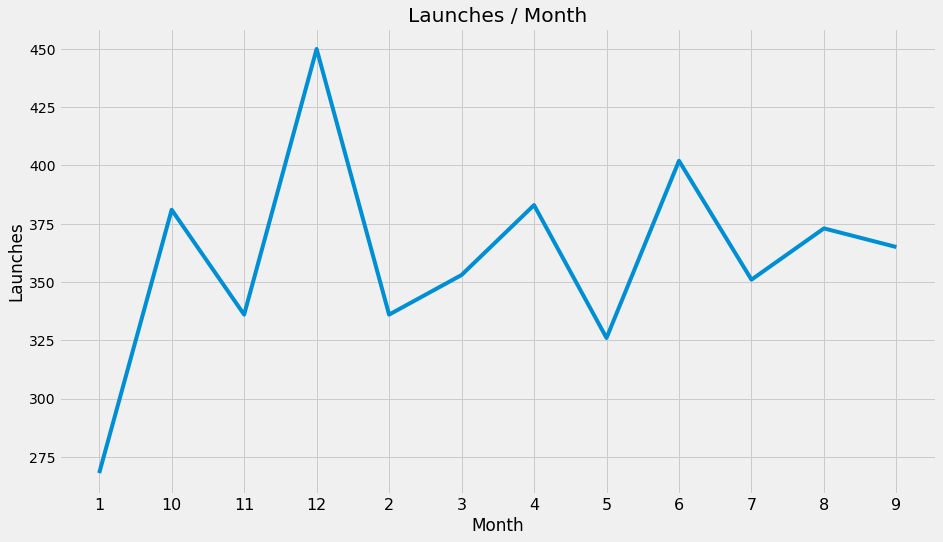

In [55]:
plt.figure(figsize=(14,8))
plt.plot(monthly_launches.index, monthly_launches)
plt.xticks(ticks=monthly_launches.index, labels=monthly_launches.index, fontsize=16)
plt.title('Launches / Month')
plt.xlabel('Month')
plt.ylabel('Launches')

plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [56]:
price = month_data.groupby('year').agg({'Price': ['mean']})
price.columns = ['Mean Price']
price.dropna(subset=['Mean Price'], how='all', inplace=True)
price.index = price.index.astype(int)
price.reset_index()

year  Mean Price
0   1964       63.23
1   1965       63.23
2   1966       59.00
3   1967      196.62
4   1968      279.20
5   1969      609.50
6   1970    1,160.00
7   1971    1,160.00
8   1972    1,160.00
9   1973    1,160.00
10  1981      450.00
11  1982      345.20
12  1983      366.16
13  1984      380.13
14  1985      408.08
15  1986      310.27
16  1987    1,687.20
17  1988    1,193.16
18  1989      380.83
19  1990      289.15
20  1991      391.43
21  1992      319.35
22  1993      276.73
23  1994      221.51
24  1995      325.00
25  1996      243.20
26  1997      221.74
27  1998      152.12
28  1999      128.51
29  2000      173.12
30  2001      290.70
31  2002      185.59
32  2003       80.51
33  2004       92.74
34  2005       95.79
35  2006      138.61
36  2007      125.70
37  2008      129.75
38  2009      180.29
39  2010      148.40
40  2011      146.60
41  2012      122.29
42  2013       90.55
43  2014      102.55
44  2015       91.55
45  2016       79.46
46  2017       69.49
47  2018       64.75
48  2019       59.61
49  2020       56.65

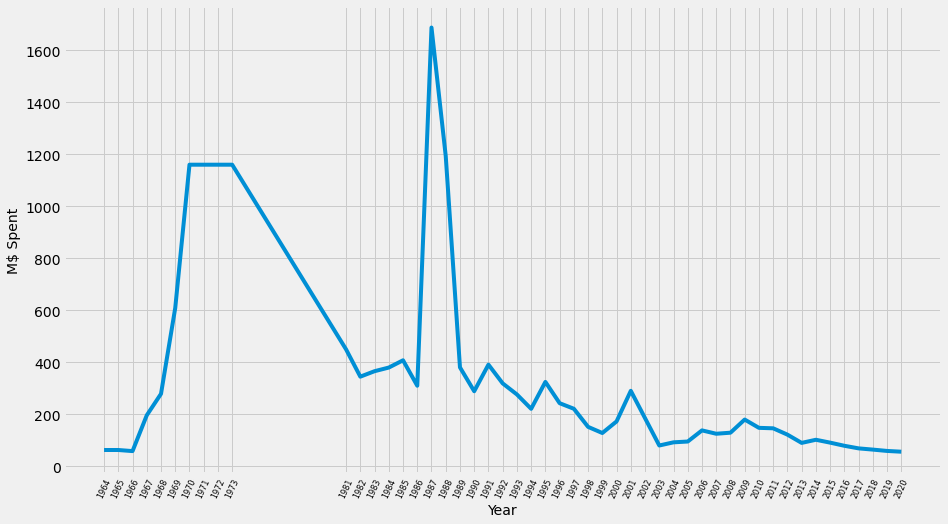

In [57]:
plt.figure(figsize=(14,8))
plt.ylabel('M$ Spent', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(ticks=price.index, fontsize=8, rotation=65)
plt.yticks(fontsize=14)
plt.plot(price)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

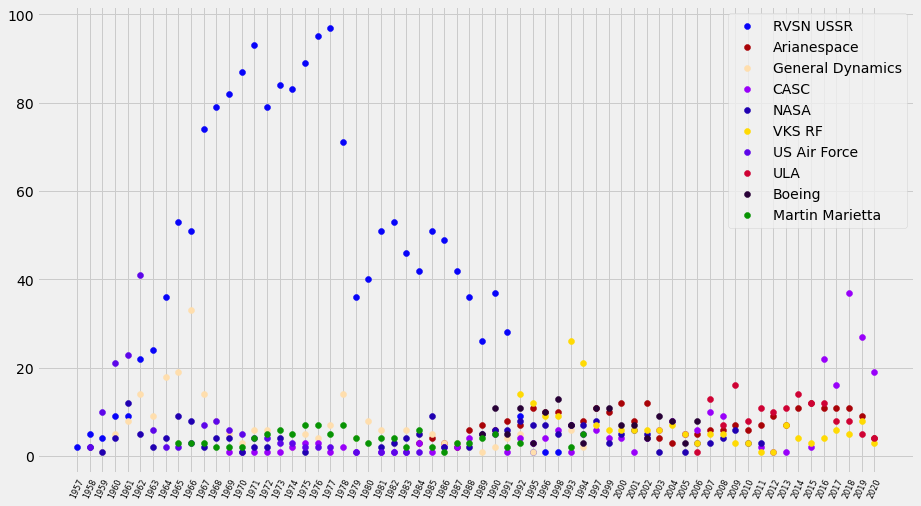

In [58]:
plt.figure(figsize=(14,8))

color_list = list(colors._colors_full_map.values())

years = month_data.groupby('year')['year']
yearss = years.unique()
yearss

for x in launches.head(10).index:
    org = month_data.loc[month_data['Organisation'] == x]
    blaa = org.groupby(['year']).agg({'Organisation': ['count']})
    plt.scatter(blaa.index, blaa, label=x, color=random.choice(color_list))

plt.xticks(ticks=yearss.index, fontsize=8, rotation=65)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

In [59]:
month_data.head(5)

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status alpha3  year month    time  
0  StatusActive  50.00        Success    USA  2020     8  2020-8  
1  StatusActive  29.75        Success    CHN  2020     8  2020-8  
2  StatusActive    nan        Success    USA  2020     8  2020-8  
3  StatusActive  65.00        Success    KAZ  2020     7  2020-7  
4  StatusActive 145.00        Success    USA  2020     7  2020-7

In [60]:
month_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status', 'alpha3', 'year', 'month', 'time'],
      dtype='object')

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [61]:
USSR = ['RUS', 'KAZ']
race = month_data.copy()
race.alpha3 = race.alpha3.replace(USSR, 'USSR')
race.alpha3.unique()
race.year = race.year.astype(int)

In [62]:
race

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive  50.00   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive    nan   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive  65.00   
4                       Atlas V 541 | Perseverance   StatusActive 145.00   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired    nan   
4320                           Juno I | Explorer 1  StatusRetired    nan   
4321                       Vanguard | Vanguard TV3  StatusRetired    nan   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired    nan   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired    nan   

     Mission_Status alpha3  year month     time  
0           Success    USA  2020     8   2020-8  
1           Success    CHN  2020     8   2020-8  
2           Success    USA  2020     8   2020-8  
3           Success   USSR  2020     7   2020-7  
4           Success    USA  2020     7   2020-7  
...             ...    ...   ...   ...      ...  
4319        Failure    USA  1958     2   1958-2  
4320        Success    USA  1958     2   1958-2  
4321        Failure    USA  1957    12  1957-12  
4322        Success   USSR  1957    11  1957-11  
4323        Success   USSR  1957    10  1957-10  

[4324 rows x 11 columns]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [63]:
war = race.loc[(race["alpha3"].isin(['USA', 'USSR'])) & (race["year"] < 1992)]
cold_war = war.groupby('alpha3')['alpha3'].count()
cold_war

alpha3
USA      662
USSR    1770
Name: alpha3, dtype: int64

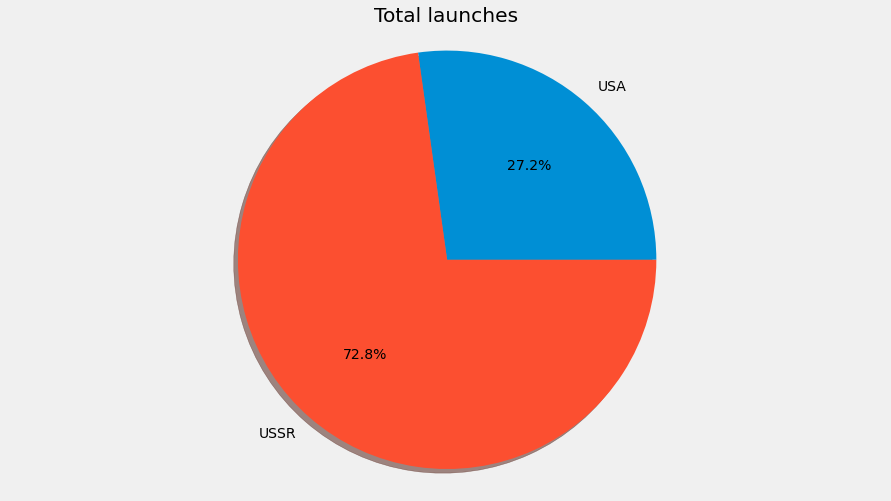

In [64]:
plt.figure(figsize=(14,8))
plt.pie(cold_war, labels=cold_war.index, autopct='%1.1f%%', shadow=True)
plt.title('Total launches')
plt.axis('equal')
plt.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [65]:
ussr = race.loc[(race["alpha3"] == 'USSR') & (race["year"] < 1992)]
cold_war_ussr = ussr.groupby('year').agg({'alpha3': 'count'})
cold_war_ussr

alpha3
year        
1957       2
1958       5
1959       4
1960       9
1961       9
1962      22
1963      24
1964      36
1965      53
1966      51
1967      75
1968      80
1969      83
1970      88
1971      93
1972      79
1973      84
1974      83
1975      89
1976      95
1977      97
1978      71
1979      36
1980      40
1981      51
1982      53
1983      46
1984      42
1985      51
1986      49
1987      42
1988      36
1989      26
1990      37
1991      29

In [66]:
usa = race.loc[(race["alpha3"] == 'USA') & (race["year"] < 1992)]
cold_war_usa = usa.groupby('year').agg({'alpha3': 'count'})
cold_war_usa

alpha3
year        
1957       1
1958      23
1959      16
1960      30
1961      43
1962      60
1963      17
1964      24
1965      33
1966      47
1967      26
1968      22
1969      17
1970      11
1971      16
1972      17
1973      17
1974      10
1975      15
1976      13
1977      14
1978      21
1979       9
1980      11
1981      13
1982      11
1983      13
1984      17
1985      16
1986       6
1987       6
1988       7
1989      16
1990      26
1991      18

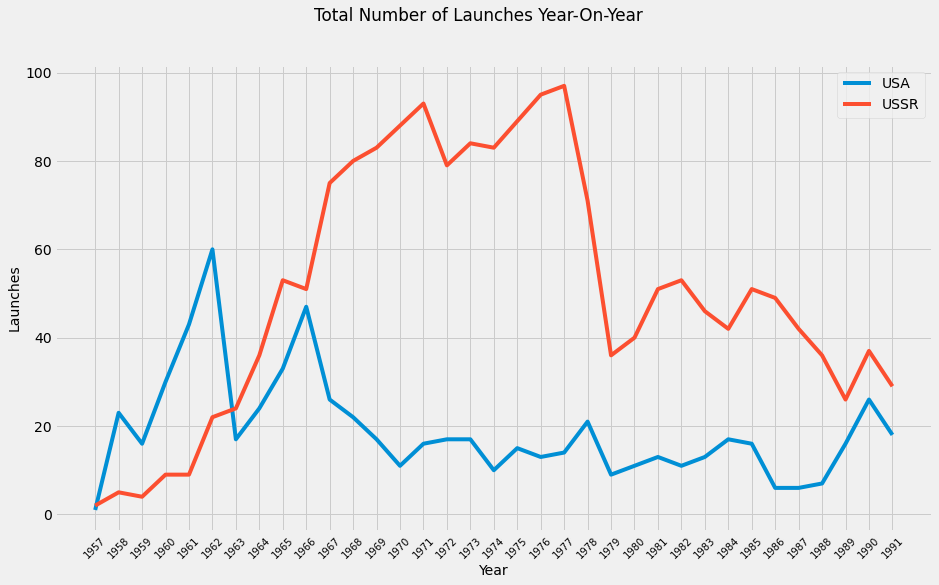

In [67]:
plt.figure(figsize=(14,8))
plt.suptitle('Total Number of Launches Year-On-Year')
plt.ylabel('Launches', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(ticks=cold_war_usa.index, labels=cold_war_usa.index, fontsize=10, rotation=45)
plt.yticks(fontsize=14)
plt.plot(cold_war_usa, label='USA')
plt.plot(cold_war_ussr, label='USSR')
plt.legend()
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [68]:
fail = month_data.loc[(month_data["Mission_Status"] != 'Success')]
fail = fail.groupby('year')['Mission_Status'].count()
fail.index = fail.index.astype(int)

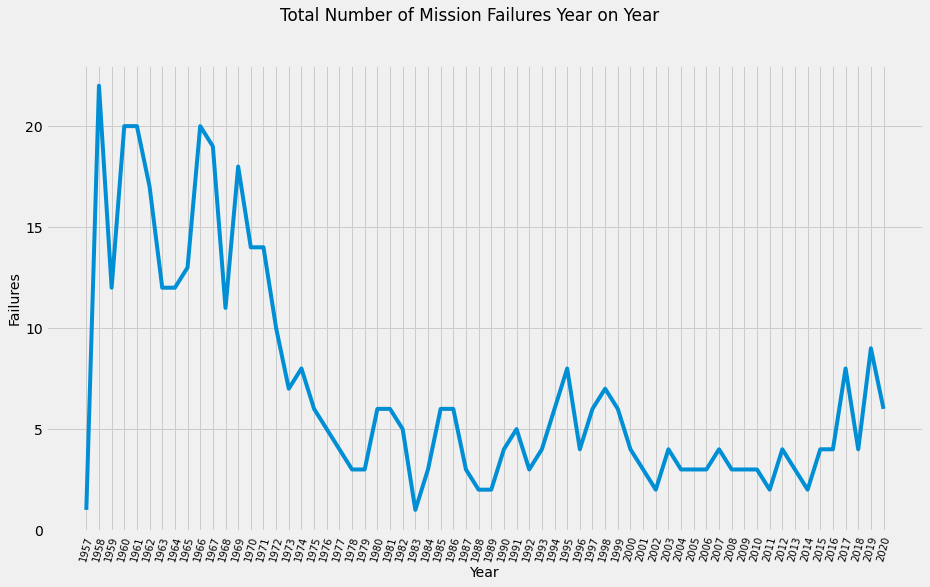

In [69]:
plt.figure(figsize=(14,8))
plt.suptitle('Total Number of Mission Failures Year on Year')
plt.ylabel('Failures', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(ticks=fail.index, fontsize=10, rotation=75)
plt.yticks(fontsize=14)
plt.plot(fail)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

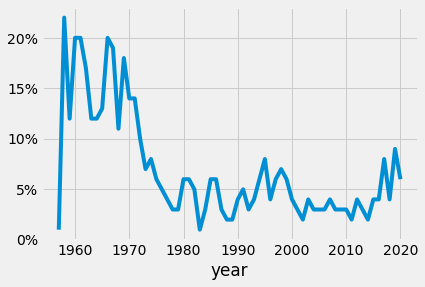

In [70]:
test = fail.plot()
fmt = '%.0f%%' 
xticks = mtick.FormatStrFormatter(fmt)
test.yaxis.set_major_formatter(xticks)

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [71]:
lead = month_data[['year', 'alpha3']]

for x in lead.year.unique():
    lead_count = lead.loc[(lead["year"] == x)]
    lead_country = lead_count.alpha3.value_counts().head(1)
    print(f"Year {x} most launches: \n{lead_country}")

Year 2020 most launches: 
CHN    22
Name: alpha3, dtype: int64
Year 2019 most launches: 
CHN    34
Name: alpha3, dtype: int64
Year 2018 most launches: 
CHN    39
Name: alpha3, dtype: int64
Year 2017 most launches: 
USA    30
Name: alpha3, dtype: int64
Year 2016 most launches: 
USA    27
Name: alpha3, dtype: int64
Year 2015 most launches: 
USA    22
Name: alpha3, dtype: int64
Year 2014 most launches: 
USA    24
Name: alpha3, dtype: int64
Year 2013 most launches: 
USA    20
Name: alpha3, dtype: int64
Year 2012 most launches: 
USA    16
Name: alpha3, dtype: int64
Year 2011 most launches: 
USA    19
Name: alpha3, dtype: int64
Year 2010 most launches: 
USA    15
Name: alpha3, dtype: int64
Year 2009 most launches: 
USA    26
Name: alpha3, dtype: int64
Year 2008 most launches: 
USA    20
Name: alpha3, dtype: int64
Year 2007 most launches: 
USA    20
Name: alpha3, dtype: int64
Year 2006 most launches: 
USA    23
Name: alpha3, dtype: int64
Year 2005 most launches: 
USA    16
Name: alpha3, dtype

In [72]:
success = month_data.loc[(month_data["Mission_Status"] == 'Success')]
success = success[['year', 'alpha3']]
success

for x in success.year.unique():
    success_count = success.loc[(success["year"] == x)]
    success_country = success_count.alpha3.value_counts().head(1)
    print(f"Year {x} most succesful launches: \n{success_country}")

Year 2020 most succesful launches: 
USA    20
Name: alpha3, dtype: int64
Year 2019 most succesful launches: 
CHN    32
Name: alpha3, dtype: int64
Year 2018 most succesful launches: 
CHN    38
Name: alpha3, dtype: int64
Year 2017 most succesful launches: 
USA    30
Name: alpha3, dtype: int64
Year 2016 most succesful launches: 
USA    26
Name: alpha3, dtype: int64
Year 2015 most succesful launches: 
USA    20
Name: alpha3, dtype: int64
Year 2014 most succesful launches: 
USA    23
Name: alpha3, dtype: int64
Year 2013 most succesful launches: 
USA    19
Name: alpha3, dtype: int64
Year 2012 most succesful launches: 
USA    15
Name: alpha3, dtype: int64
Year 2011 most succesful launches: 
USA    18
Name: alpha3, dtype: int64
Year 2010 most succesful launches: 
USA    15
Name: alpha3, dtype: int64
Year 2009 most succesful launches: 
USA    25
Name: alpha3, dtype: int64
Year 2008 most succesful launches: 
USA    19
Name: alpha3, dtype: int64
Year 2007 most succesful launches: 
USA    17
Name:

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [73]:
yoy = month_data[['year', 'Organisation']]
most = yoy.groupby('year').apply(lambda x: x['Organisation'].value_counts().index[0])
most.index = most.index.astype(int)
most

year
1957       RVSN USSR
1958         US Navy
1959    US Air Force
1960    US Air Force
1961    US Air Force
            ...     
2016            CASC
2017          SpaceX
2018            CASC
2019            CASC
2020            CASC
Length: 64, dtype: object

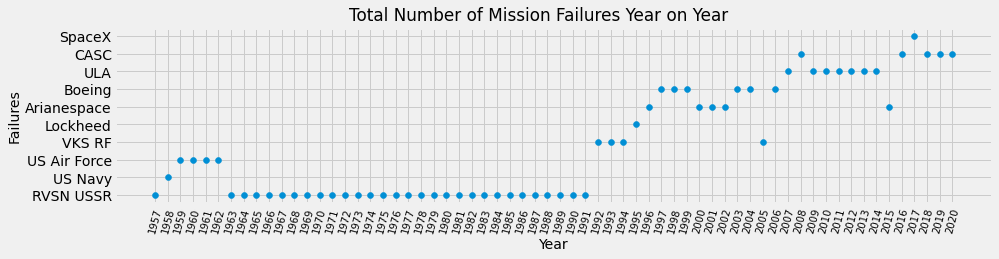

In [74]:
plt.figure(figsize=(14,3))
plt.suptitle('Total Number of Mission Failures Year on Year')
plt.ylabel('Failures', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.xticks(ticks=most.index, fontsize=10, rotation=75)
plt.yticks(fontsize=14)
plt.scatter(most.index, most)
plt.show()